## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from pprint import pprint
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# 1.Dataset

In [2]:
airbnb =pd.read_csv("C:/Users/Madalena Nunes/OneDrive/Ambiente de Trabalho/Business Analytics/Tese/data/newtable.csv",parse_dates=['first_review', 'last_review', 'host_since'], index_col="id")

In [57]:
airbnb.head()

,name,description,host_since,host_response_time,host_response_rate,host_is_superhost,neighborhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_days_active,check_in_24h,air_conditioning,balcony,nature_and_views,bed_linen,tv,coffee_machine,cooking_basics,white_goods,elevator,child_friendly,parking,host_greeting,hot_tub_sauna_or_pool,internet,long_term_stays,private_entrance,time_since_first_review,time_since_last_review
0,Belém 1 Bedroom Historical Apartment,"This apartment is all about Location, next to ...",2009-04-22,within an hour,100%,0.0,Belm,38.69750,-9.19768,House,Entire home/apt,4,1.0,1.0,1.0,40,3,365,7,315,32,2014-09-02,2021-11-01,0-79/100,5/5,5/5,5/5,5/5,5/5,1,1,1,0,0,4889.0,NaN,NaN,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,4+ years,no reviews
1,Heart of Alfama Lisbon Center - Cœur de l'Alfama,*** 100% Covid 19 cleaning protocols <br />NON...,2010-04-12,within an hour,100%,1.0,Santa Maria Maior,38.71241,-9.12706,House,Entire home/apt,3,1.0,1.0,1.0,50,2,14,19,325,127,2014-04-24,2021-11-27,0-79/100,5/5,5/5,5/5,5/5,5/5,1,1,1,0,0,4534.0,NaN,NaN,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,4+ years,no reviews
2,Apartamento Alfama com vista para o rio!,<b>The space</b><br />Located in the city cent...,2010-05-16,within a few hours,100%,0.0,Santa Maria Maior,38.71082,-9.12719,House,Entire home/apt,4,1.0,1.0,2.0,60,5,1125,4,190,337,2011-01-01,2021-12-03,0-79/100,5/5,5/5,5/5,5/5,5/5,1,1,1,0,0,4500.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,4+ years,no reviews
3,Alfama Hill - Boutique apartment,Feel at home in the historic centre of Lisbon....,2010-05-17,within an hour,100%,1.0,Santa Maria Maior,38.71156,-9.12987,House,Entire home/apt,4,1.0,1.0,1.0,60,2,1125,12,302,299,2012-05-22,2021-12-03,0-79/100,5/5,5/5,5/5,5/5,5/5,1,1,1,0,0,4499.0,NaN,NaN,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,4+ years,no reviews
4,TheHOUSE - Your luxury home,"A house at the top of an anonimous building, T...",2010-05-19,within a day,90-99%,0.0,Estrela,38.71108,-9.15979,House,Entire home/apt,16,8.0,9.0,13.0,957,2,1125,21,248,64,2011-01-05,2021-11-14,0-79/100,5/5,5/5,5/5,5/5,5/5,0,2,2,0,0,4497.0,NaN,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,4+ years,no reviews


# 2. Cleaning and pre-processing

In [4]:
# printing dimensions
print(f'number of rows: {airbnb.shape[0]}')
print(f'number of columns: {airbnb.shape[1]}')

number of rows: 18526
number of columns: 73


In [56]:
# creating a dataframe with nulls, datatypes and unique values 
nulos=pd.DataFrame({'null_values':np.round(airbnb.isnull().mean(), 2), 
              'data_type':airbnb.dtypes, 
              'unique_values': airbnb.nunique()})

pd.set_option("display.max_rows", None, "display.max_columns", None) #to show full dataframe
print(nulos)

                                              null_values       data_type  \
name                                                 0.00          object   
description                                          0.00          object   
host_since                                           0.00  datetime64[ns]   
host_response_time                                   0.00          object   
host_response_rate                                   0.00          object   
host_is_superhost                                    0.00         float64   
neighborhood                                         0.00          object   
latitude                                             0.00         float64   
longitude                                            0.00         float64   
property_type                                        0.00          object   
room_type                                            0.00          object   
accommodates                                         0.00           int64   


We can see that the variable *calendar_updated* is only nulls, while *neighborhood_overview* and *neighbourhood *is 35% nulls.
The variable *bathrooms_text* is the same as *bathrooms* but in string, so we can remove it.

Olhando as primeiras linhas e comparando com o tipo dos dados vemos que algumas variáveis estão incorretas, é o caso das variáveis host_id que é do tipo categórica e está como inteiro e a last_review que é do formato data e está como objeto, vamos fazer as devidas transformações em seguida.
Also, host_response_rate needs to be converted to numeric



In [6]:
airbnb['host_response_rate'] = airbnb['host_response_rate'].astype(float) #? verifcar again

Notes: potential drops

 - Looking at the percentage of NaN values above it is clear that we can drop  license.

 - name, space,  tell the same thing. Drop  name.

 - review_scores_cleanliness and review_scores_accuracy tells us the same thing and one of them can be dropped.

  - host_identity_verified and host_has_profile_pic are unique and add no value to out model.

  - listing_url, scrape_id, last_scraped, , , , , , picture_url, host_url, host_about, host_thumbnail_url, host_picture_url and host_verifications can be dropped.

   - host_listings_count, host_total_listings_count tells the same thing. host_total_listings_count can be dropped
   
 Notes: Attributes that need to be further looked into before we delete more features

  - host_location, host_neighbourhood, , neighborhood, neighborhood_cleansed, neighbourhood_group_cleansed tell us the same thing and needs to be further looked into.

  

  - minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights minimum_nights_avg_ntm, maximum_nights_avg_ntm seems to have the same information and needs to be further looked into



  - host_response_rate, host_acceptance_rate has % sign that needs to be removed.

    - price  have dollar signs that need to be stripped.

  - we could extract some important information from amenities and description using NLP.
  

In [7]:
# minimum_nights, maximum_nights, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, 
# maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm 
#seems to have the same information and needs to be further looked into

airbnb[['minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 
'minimum_maximum_nights', 'maximum_maximum_nights','minimum_nights_avg_ntm', 'maximum_nights_avg_ntm']].head(15)

# looking at this we will just keep minimum_nights and maximum_night and delete the rest 

,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm
id,,,,,,,,
6499,3,365,3,3,365,365,3.0,365.0
25659,2,14,2,2,1125,1125,2.0,1125.0
29248,5,1125,5,5,1125,1125,5.0,1125.0
29396,2,1125,2,3,1125,1125,2.3,1125.0
29720,2,1125,2,2,1125,1125,2.0,1125.0
29915,5,365,5,5,365,365,5.0,365.0
33348,1,730,1,1,730,730,1.0,730.0
40817,1,1125,1,1,1125,1125,1.0,1125.0
42519,1,1125,1,1,1125,1125,1.0,1125.0


In [8]:
#lets look into the neighborhood column and see what might help us in predicting the price 
airbnb[['host_location', 'host_neighbourhood',  'neighbourhood', 'neighbourhood_cleansed',  
    'neighbourhood_group_cleansed']].head(5)

# since they all seem to be giving the same information and neighbourhood_cleansed has no NaN values we will keep that and drop everything else

,host_location,host_neighbourhood,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
id,,,,,
6499,"Brussels, Bruxelles, Belgium",NaN,"Lisbon, Portugal",Belm,Lisboa
25659,"New York, New York, United States",Alfama,"Lisboa, Portugal",Santa Maria Maior,Lisboa
29248,"Vila Nova de Gaia, Porto, Portugal",Alfama,NaN,Santa Maria Maior,Lisboa
29396,"Olival Basto, Lisboa, Portugal",NaN,"Lisbon, Portugal",Santa Maria Maior,Lisboa
29720,"Lisbon, Lisbon, Portugal",Estrella/Lapa,"Lisbon, Portugal",Estrela,Lisboa


In [9]:
airbnb= airbnb.rename({"neighbourhood_cleansed":"neighborhood"}, axis='columns')

In [10]:
# lets drop what we can and then further look into the features 
# making a list of all the columns to be dropped -columns which are not useful for predicting price 
drop_cols = ['calendar_updated', 'neighborhood_overview', 'listing_url', 'scrape_id', 'last_scraped',  
            'picture_url',  'host_url', 'host_about', 'host_thumbnail_url', 'host_picture_url',
            'host_verifications', 'host_total_listings_count', 'host_identity_verified',
            'host_has_profile_pic','host_location','host_listings_count','neighbourhood','neighbourhood_group_cleansed','minimum_minimum_nights','maximum_minimum_nights',
            'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm',
            'calendar_last_scraped','number_of_reviews_ltm','number_of_reviews_l30d','review_scores_cleanliness','bathrooms_text','license','host_acceptance_rate']
# making a new dataframe 
airbnb = airbnb.drop(drop_cols, axis=1)
airbnb.shape 

(18526, 42)

Lets see what we have left

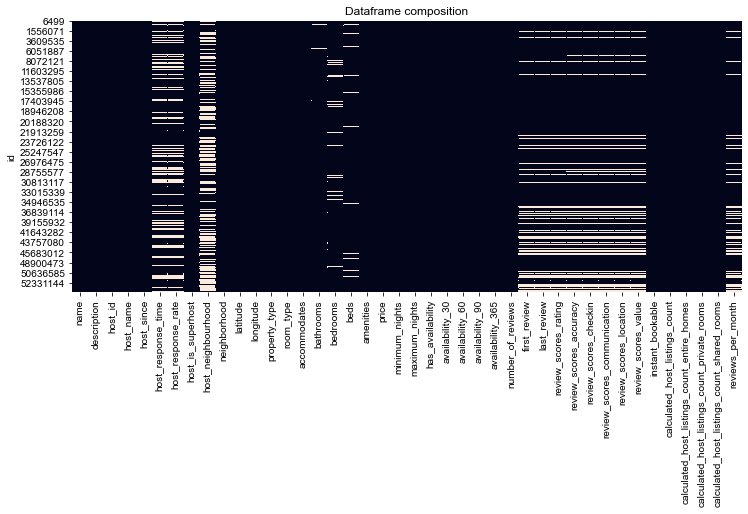

In [11]:
# defininf plotting area
plt.figure(figsize=(12,5))

# plotting the graph
sns.heatmap(airbnb.isnull(), cbar=False)
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)
plt.title('Dataframe composition')
plt.show()

About a forth of rows don't have a value for host_response_time, and the majority of these have also not yet been reviewed. Therefore this section of the data set consists primarily of properties which have not yet had a completed stay (most likely properties which have not yet had a booking, although may also include properties that have a booking currently occuring). Although this is a considerable proportion of the dataset, these listings will be retained in the data because they are still legitimate properties with advertised prices, and are still part of the comparative market when considering the price for which to advertise your Airbnb listing. However, if the dataset being used had the actual average price paid as its target, it would be necessary to drop these rows because they would not have a value, as they have not yet been booked.

It is worth noting, however, that this group of listings probably also contains a large number of 'inactive' listings. These are properties which have been speculatively listed on Airbnb but either have their calendars closed (so no stays can be booked), or have prices which are notably higher than other properties in their area. Because host_response_time is unknown for so many listings, it will be retained as its own category, 'unknown'.

In [12]:
airbnb.host_response_time.fillna("unknown", inplace=True)
airbnb.host_response_time.value_counts(normalize=True)

within an hour        0.537083
unknown               0.251268
within a few hours    0.108442
within a day          0.073734
a few days or more    0.029472
Name: host_response_time, dtype: float64

A similar story is true for host_response_rate, with about a third of values being null. This will also be kept as its own category, after grouping other values into meaningful groups (i.e. transforming this into a categorical feature, rather than a numerical one). Because about 75% of hosts respond 100% of the time, this will be kept as its own category, and other values will be grouped into bins.

In [13]:
# Bin into four categories
airbnb.host_response_rate = pd.cut(airbnb.host_response_rate, 
                               bins=[0, 50, 90, 99, 100], 
                               labels=['0-49%', '50-89%', '90-99%', '100%'], 
                               include_lowest=True)
airbnb.host_response_rate = airbnb.host_response_rate.astype('str')
airbnb.host_response_rate.fillna("unknown", inplace=True)

# Category counts
airbnb.host_response_rate.value_counts()

100%       10142
unknown     4655
50-89%      1649
90-99%      1402
0-49%        678
Name: host_response_rate, dtype: int64

Some cleaning of property types is required as there are a large number of categories with only a few listings. The categories Apartment, House, Room and Shared Room and Other will be used, as most properties can be classified as either apartment ,house or room.

In [14]:
airbnb.property_type.value_counts()

Entire rental unit                     10841
Private room in rental unit             2220
Entire residential home                 1079
Entire condominium (condo)               478
Entire villa                             401
Private room in residential home         362
Room in boutique hotel                   332
Entire serviced apartment                268
Entire loft                              224
Private room in bed and breakfast        165
Private room in guesthouse               152
Entire townhouse                         142
Entire cottage                           122
Private room in hostel                   106
Private room in condominium (condo)      104
Private room in guest suite              104
Camper/RV                                103
Private room in villa                    100
Shared room in hostel                     93
Room in hotel                             86
Entire guesthouse                         76
Private room in serviced apartment        67
Private ro

In [15]:
# Replacing categories that are types of houses or apartments
airbnb.property_type.replace({
    'Townhouse': 'House',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Entire rental unit' : 'House',
    'Private room in rental unit' :'Room',
    'Entire residential home': 'House',
    'Entire condominium (condo) ':'House',
    'Entire villa ': 'House',
    'Private room in residential home ': 'Room',
    'Room in boutique hotel': 'Room',
    'Entire serviced apartment': 'Apartment',
    'Entire loft': 'Apartment',
    'Private room in bed and breakfast ': 'Room',
    'Private room in guesthouse ': 'Room',
    'Entire townhouse ':'Room',                      
    'Entire cottage ': 'House',                         
    'Private room in hostel': 'Room',                 
    'Private room in guest suite' : 'Room',              
    'Private room in condominium (condo)': 'Room',
    'Private room in villa': 'Room',                     
    'Shared room in hostel': 'Shared Room',                    
    'Entire guesthouse': 'House' ,                      
    'Private room in serviced apartment' :'Room' ,      
    'Private room in townhouse' : 'Room'    ,           
    'Tiny house': 'House' ,                               
    'Room in serviced apartment' : 'Room' ,               
    'Shared room in bed and breakfast': 'Shared Room'  ,        
    'Room in bed and breakfast': 'Room'  ,  
    'Shared room in rental unit': 'Shared room',
    'Shared room in residential home': 'Shared room',
                
    'Room in aparthotel': 'Room' ,                       
    'Room in hostel': 'Room' ,
    'Casa particular': 'House',                          
    'Private room in castle': 'Room',
    'Private room in casa particular ':'Room',
    'Entire chalet': 'House',
    'Private room in nature lodge ': 'Room',
    'Private room in chalet ': 'Room',
    'Shared room in guesthouse ': 'Shared room',
    'Private room in cottage': 'Room',
    'Entire bungalow ': 'House',
    'Entire vacation home ':'House',
    'Entire place': 'House',
    'Private room in loft': 'Room',
    'Private room in farm stay ':'Room',
    'Shared room in condominium (condo)': 'Shared room',
    'Private room ': 'Room',
    'Shared room in townhouse':'Shares room',
    'Private room in tiny house ':'Room',
    'Shared room in guest suite ':'Shared room',
    'Private room in dome house ':'Room',
    'Private room in vacation home ':'Room',
    'Entire home/apt':'House',
    'Shared room in boutique hotel  ': 'Shared room',
    'Shared room in casa particular ': 'Shared room',
    'Shared room in serviced apartment ':'Shared room',
    'Shared room in tiny house': 'Shared room',  
    
    'Chalet': 'House'  
    }, inplace=True)

# Replacing other categories with 'other'
airbnb.loc[~airbnb.property_type.isin(['House', 'Apartment', 'Shared room']), 'property_type'] = 'Other'

In [16]:
airbnb.property_type.value_counts()

House          12127
Other           5823
Apartment        492
Shared room       84
Name: property_type, dtype: int64

beds and bedrooms: Missing values will be replaced with the median (to avoid strange fractions).

In [17]:
for col in [ 'bedrooms', 'beds']:
    airbnb[col].fillna(airbnb[col].median(), inplace=True)

Checking whether boolean and categorical features contain sufficient numbers of instances in each category to make them worth including

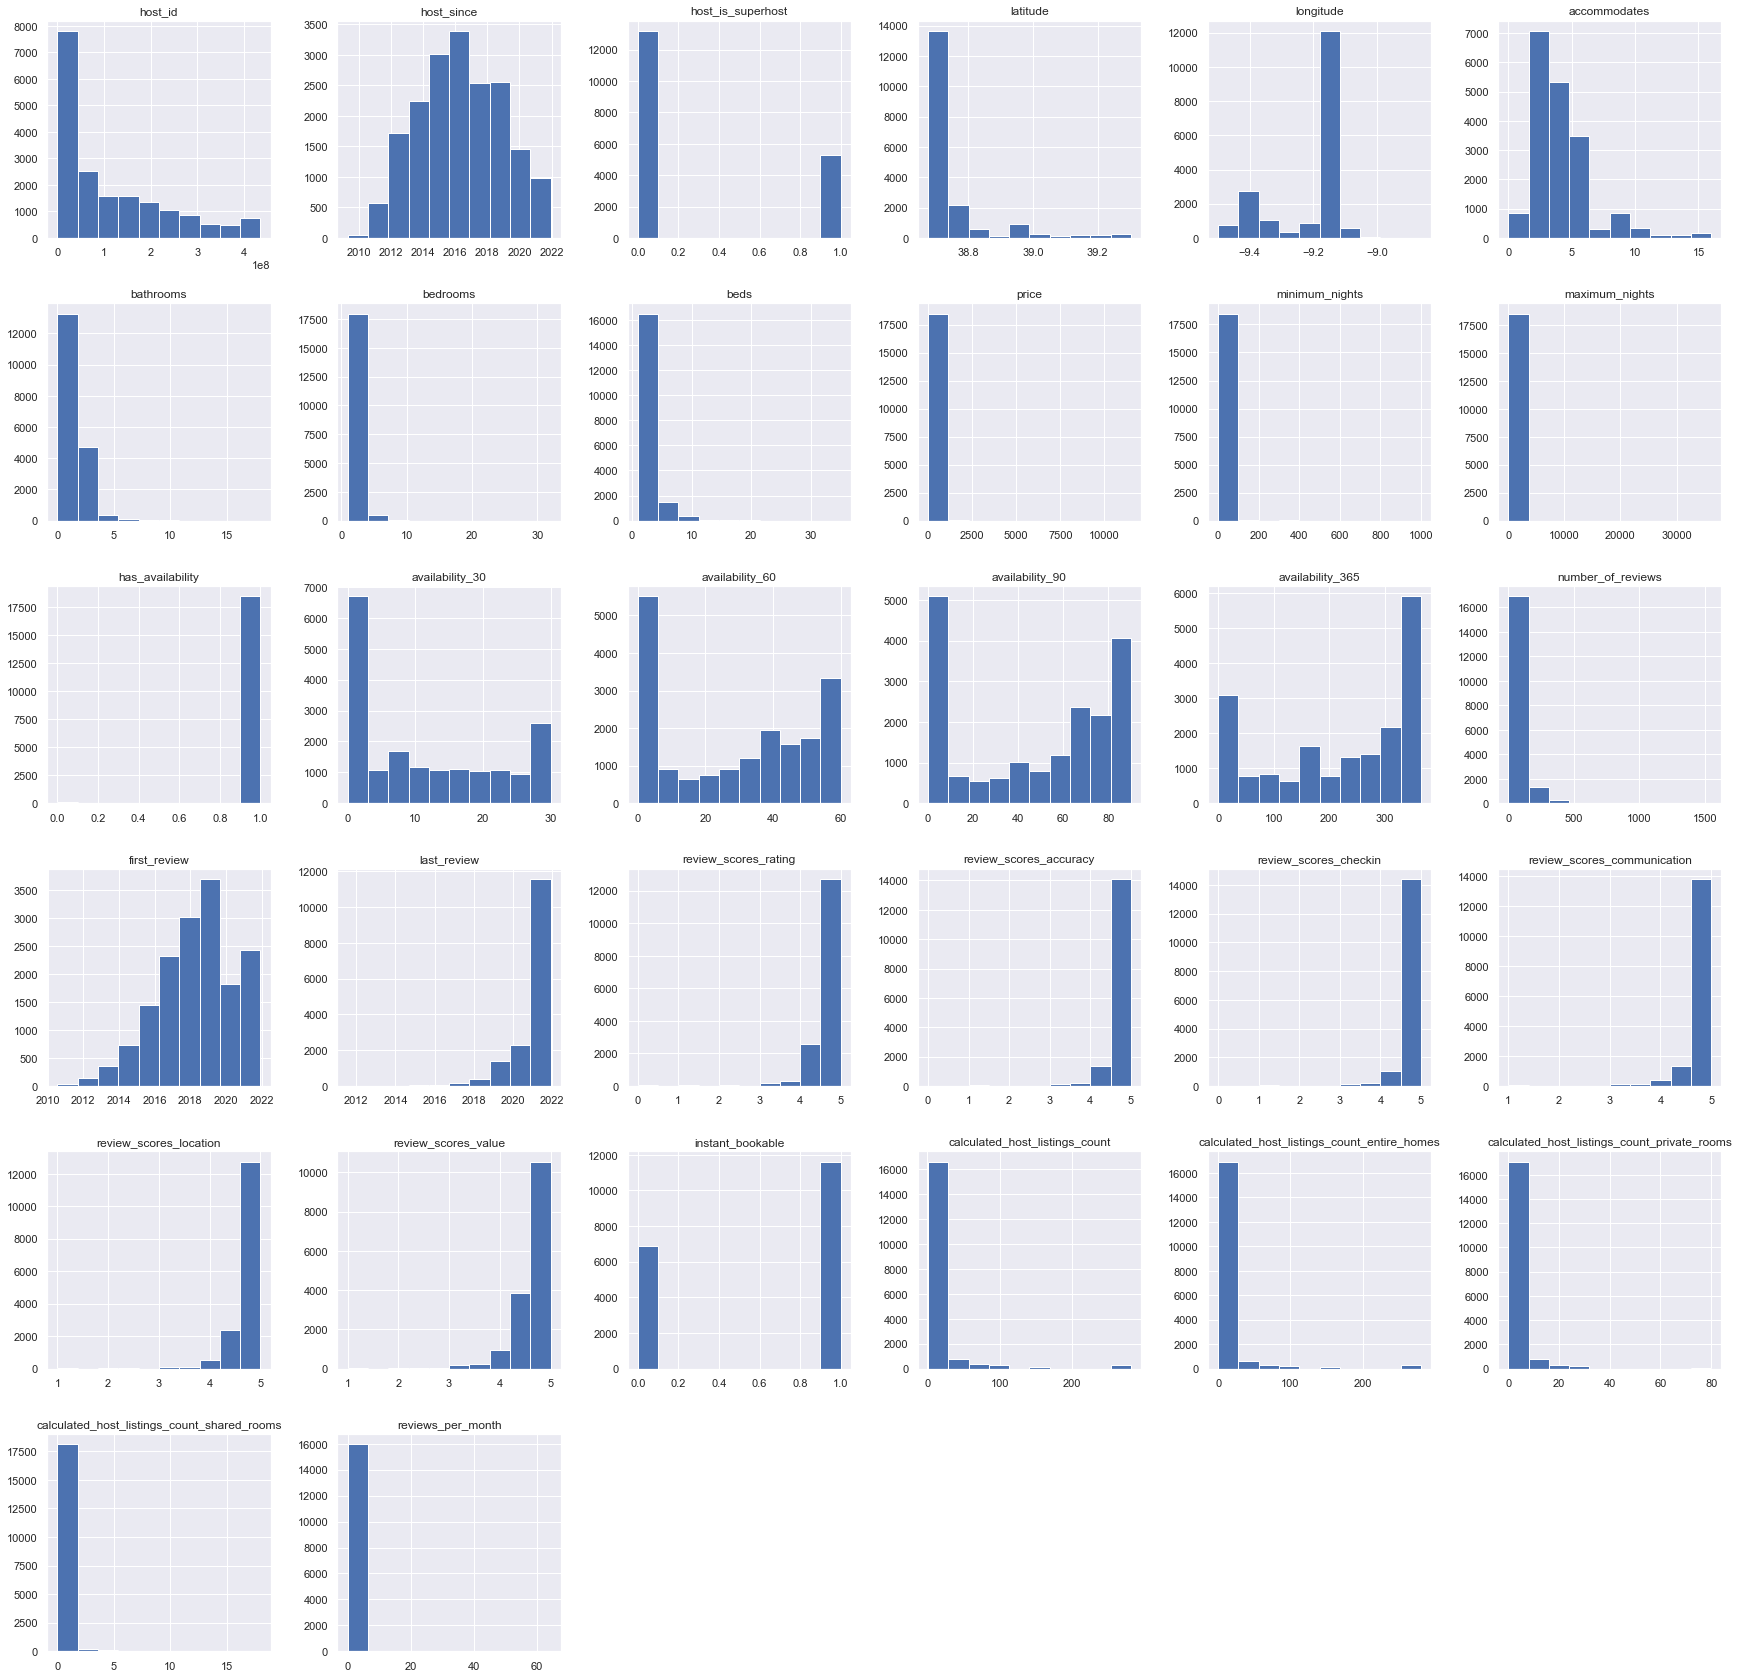

In [18]:
# Replacing columns with f/t with 0/1
airbnb.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
airbnb.hist(figsize=(30,30));

From the above, it can be seen that *has_availability* only contain one category and can be dropped:

In [19]:
drop_catcols = ['has_availability']
airbnb = airbnb.drop(drop_catcols, axis=1)

In [20]:
# we could further delete the columns with high cardinality(names, ids,etc) or high percentage of NaNs
drop_cols3 = ['host_id', 'host_name', 'host_neighbourhood']
airbnb = airbnb.drop(drop_cols3, axis=1)
airbnb.shape 

(18526, 38)

*host_since* is a datetime column, and will be converted into a measure of the number of days that a host has been on the platform, measured from the date that the data was scraped (September 10, 2022). The original column will be left in initially for EDA, and dropped later.

In [21]:
# Calculating the number of days
airbnb['host_days_active'] = (pd.datetime(2022, 9, 10) - airbnb.host_since).astype('timedelta64[D]')

# Printing mean and median
print("Mean days as host:", round(airbnb['host_days_active'].mean(),0))
print("Median days as host:", airbnb['host_days_active'].median())

# Replacing null values with the median
airbnb.host_days_active.fillna(airbnb.host_days_active.median(), inplace=True)

Mean days as host: 2331.0
Median days as host: 2346.0


In [22]:
# lets have a lool where stand with our null values 
total_nan = airbnb.isna().sum().sort_values(ascending=False)
percentage_nan = (total_nan / airbnb.shape[0]) * 100
tabel = pd.concat([total_nan, percentage_nan], axis=1, keys=['Total NaN values', 'Percentage of NaN values'])
tabel

,Total NaN values,Percentage of NaN values
review_scores_communication,2597,14.018137
review_scores_checkin,2597,14.018137
review_scores_location,2597,14.018137
review_scores_value,2596,14.012739
review_scores_accuracy,2596,14.012739
reviews_per_month,2506,13.526935
first_review,2506,13.526935
last_review,2506,13.526935
review_scores_rating,2506,13.526935
bathrooms,75,0.404836


In [23]:
# Resetting the index as we deleted some rows 
airbnb.reset_index(drop=True, inplace=True)

 `Amenities-NLP`

In [24]:
# Example of amenities listed
airbnb.amenities[:1].values

array(['["Dishwasher", "Cooking basics", "Refrigerator", "Mini fridge", "Free washer \\u2013 In unit", "Iron", "Drying rack for clothing", "TV with standard cable", "First aid kit", "Kitchen", "Bed linens", "Laundromat nearby", "Hair dryer", "Host greets you", "Cleaning products", "Cable TV", "Coffee maker", "Carbon monoxide alarm", "Extra pillows and blankets", "Stove", "Wifi", "Room-darkening shades", "Freezer", "Essentials", "Shampoo", "Dining table", "Long term stays allowed", "Paid parking on premises", "Free street parking", "Dishes and silverware", "Fire extinguisher", "Microwave", "Hot water", "Hangers", "Oven", "Ethernet connection"]'],
      dtype=object)

In [25]:
# Creating a set of all possible amenities
amenities_list = list(airbnb.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)


In the list above, some amenities are more important than others (i.e. a balcony is more likely to increase price than a fax machine), and some are likely to be fairly uncommon (i.e.. 'Electric profiling bed'). For the purpose of this project, amenities will be extracted based on quick research into which amenities are considered by guests a selection of the more important as well as personal experience. These will be further investigated in the EDA section. For example, if it turns out that almost all properties have/do not have a particular amenity, that feature will not be very useful in helping explain differences in prices.

The amenities chosen are (slashes indicate separate categories that can be combined):

- 24-hour check-in
- Air conditioning/central air conditioning
- Amazon Echo/Apple TV/DVD player/game console/Netflix/projector and screen/smart TV (i.e. non-basic electronics)
- BBQ grill/fire pit/propane barbeque
- Balcony/patio or balcony
- Beach view/beachfront/lake access/mountain view/ski-in ski-out/waterfront (i.e. great location/views)
- Bed linens
- Breakfast
- Cable TV/TV
- Coffee maker/espresso machine
- Cooking basics
- Dishwasher/Dryer/Washer/Washer and dryer
- Elevator
- Exercise equipment/gym/private gym/shared gym
- Family/kid friendly, or anything containing 'children'
- Free parking on premises/free street parking/outdoor parking/paid parking off premises/paid parking on premises
- Garden or backyard/outdoor seating/sun loungers/terrace
- Host greets you
- Hot tub/jetted tub/private hot tub/sauna/shared hot tub/pool/private pool/shared pool
- Internet/pocket wifi/wifi
- Long term stays allowed
- Pets allowed/cat(s)/dog(s)/pets live on this property/other pet(s)
- Private entrance
- Safe/security system
- Self check-in
- Smoking allowed
- Step-free access/wheelchair accessible, or anything containing 'accessible'
- Suitable for events

In [26]:
airbnb.loc[airbnb['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
airbnb.loc[airbnb['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
airbnb.loc[airbnb['amenities'].str.contains('TV'), 'tv'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Elevator'), 'elevator'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
airbnb.loc[airbnb['amenities'].str.contains('parking'), 'parking'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
airbnb.loc[airbnb['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

One way to reduce the number of features is to remove the amenities which add relatively little information, or are relatively unhelpful in differentiating between different listings. Amenity features where either the true or the false category contains fewer than 10% of listings will be removed.

In [27]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = airbnb.iloc[:,41:].columns
airbnb[cols_to_replace_nulls] = airbnb[cols_to_replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in airbnb.iloc[:,41:].columns:
    if airbnb[col].sum() < len(airbnb)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
airbnb.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
airbnb.drop('amenities', axis=1, inplace=True)

['high_end_electronics', 'bbq', 'breakfast', 'gym', 'outdoor_space', 'pets_allowed', 'secure', 'self_check_in', 'smoking_allowed', 'accessible', 'event_suitable']


In [28]:
airbnb.columns[40:]

Index(['balcony', 'nature_and_views', 'bed_linen', 'tv', 'coffee_machine',
       'cooking_basics', 'white_goods', 'elevator', 'child_friendly',
       'parking', 'host_greeting', 'hot_tub_sauna_or_pool', 'internet',
       'long_term_stays', 'private_entrance'],
      dtype='object')

In [29]:
# plotando o gráfico de densidade
# definindo as colunas numéricas
# definindo as colunas numéricas
columns_list = ['price', 'number_of_reviews', 
                'reviews_per_month', 'calculated_host_listings_count','availability_30' ,'availability_60','availability_90','availability_365', 'bathrooms',
                'accommodates','bathrooms','number_of_reviews','review_scores_rating','review_scores_accuracy',
                'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value',
                'calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
                'calculated_host_listings_count_shared_rooms','reviews_per_month',
                #host_days_active
               'bedrooms', 'beds','minimum_nights','maximum_nights', 'longitude','latitude', 'review_scores_accuracy']

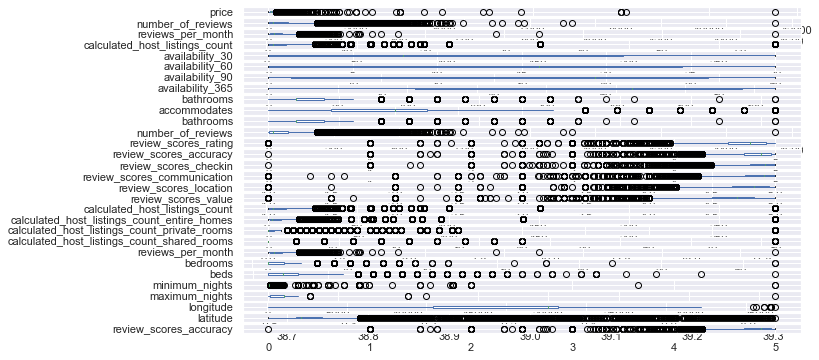

In [30]:
# definindo área de plotagem
fig, ax = plt.subplots(30, 1, figsize=(10,6))

# criando loop para plotagem
idx_ = 0
for i in columns_list:
    idx_ += 1
    plt.subplot(30, 1, idx_)
    airbnb[i].plot(kind='box', vert=False)
plt.tight_layout()

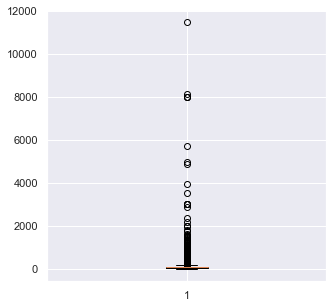

In [31]:
 
fig = plt.figure(figsize =(5, 5))
 
# Creating plot
plt.boxplot(airbnb['price'])
 
# show plot
plt.show()


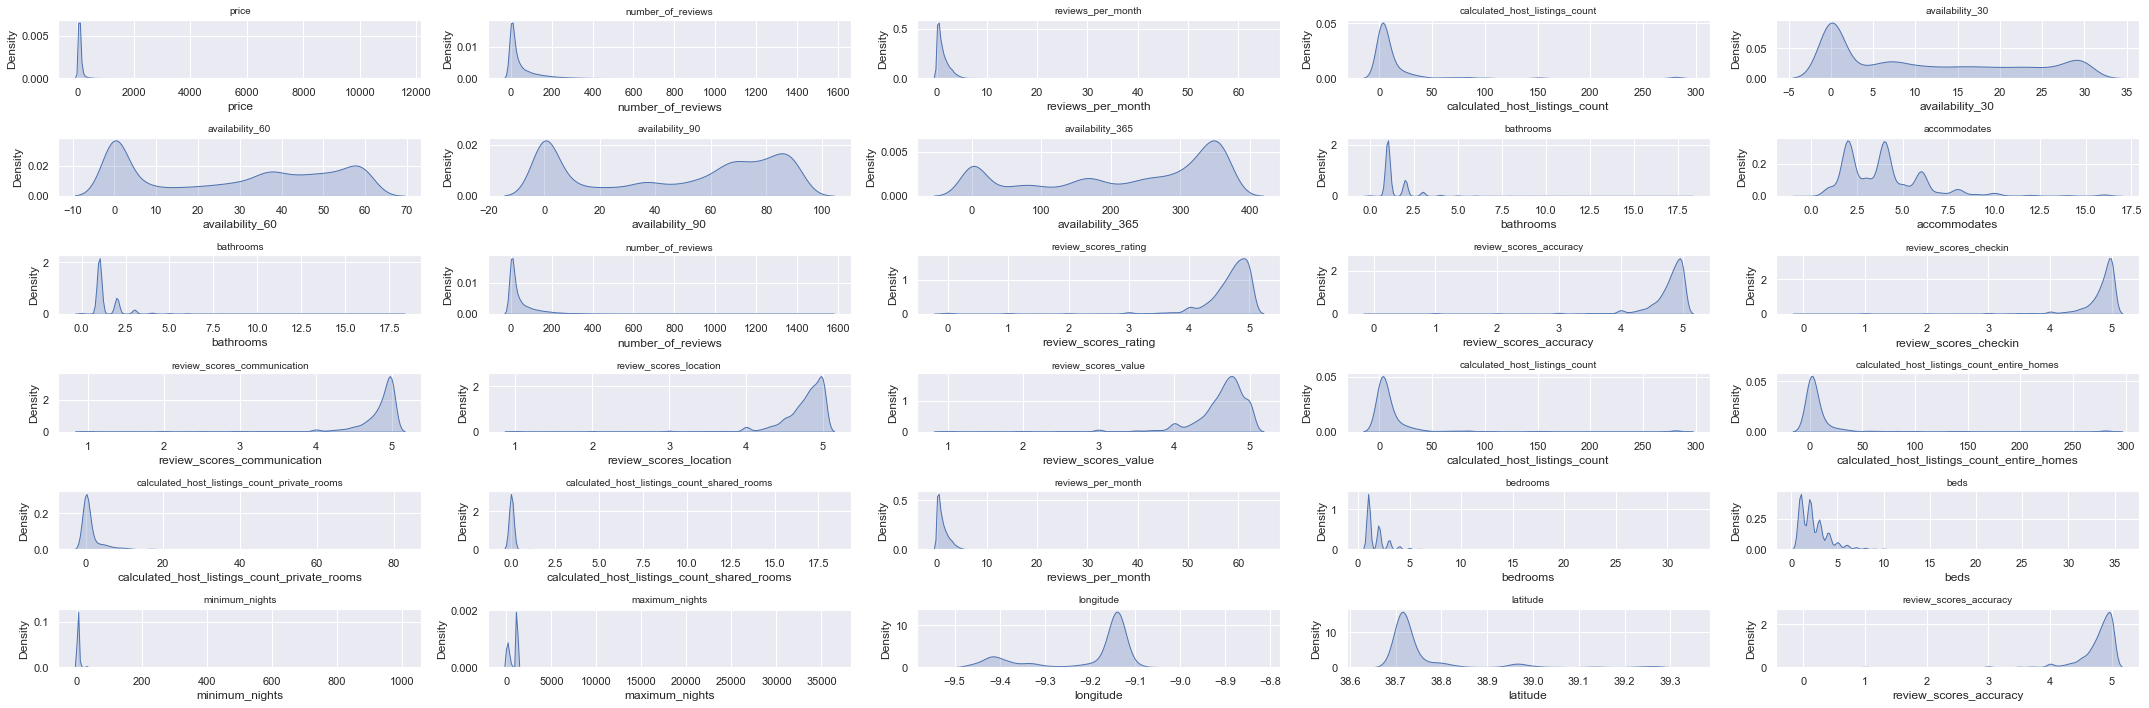

In [32]:

#plotting distribution of  numeric variables

# criando objeto para número de linhas e colunas
nrows = 6
ncols = 5

# definindo área de plotagem
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30,10))
fig.subplots_adjust(hspace=1, wspace=1)

# criando loop para plotagem
idx = 0
for col in columns_list:
    idx += 1
    plt.subplot(nrows, ncols, idx)
    sns.kdeplot(airbnb[col], shade=True)
    plt.title(col, fontsize=10)
plt.tight_layout()

` Price`

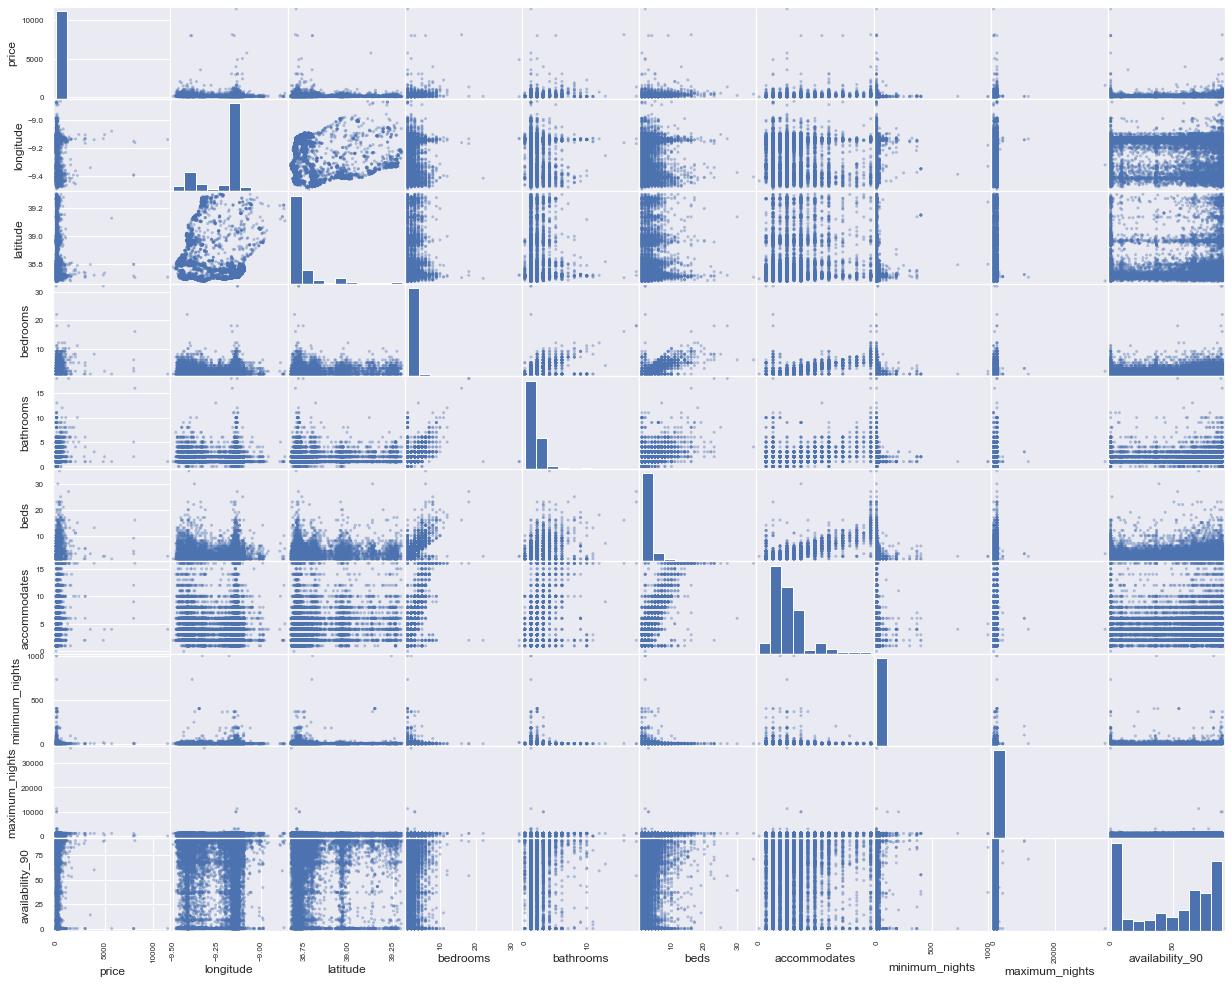

In [33]:
colsdv = ['price','longitude', 'latitude', 'bedrooms', 
        'bathrooms', 'beds','accommodates','minimum_nights','maximum_nights','availability_90']

from pandas.plotting import scatter_matrix
scatter_matrix(airbnb[colsdv], alpha=0.4, figsize=(21,17))
plt.savefig(r"figure_2.png")
plt.show()

# Observations:
 -Longitude, accomodates, availability_90 Latitude are the only attributes that are not badly skewed.

  - Our target Vector in particular is highly positively skewed and needs attention.

  - They all seem to have a lot of outliers.

  - Bathrooms, , beds, bedrooms are positively correlated with the price.

Price cap is clearly visible at 10,000, but it shouldn't be a problem for us as we will be filtering out such expensive night stays for our model to predict well.

There are straight lines visible in the bathroom scatter plot as well.

In [34]:
# Finding skewness of the following attributes
cols = ['longitude', 'latitude','price', 'bathrooms',  'bedrooms', 'beds', 'accommodates', 'maximum_nights', 'minimum_nights','review_scores_accuracy','number_of_reviews',
       'reviews_per_month','availability_30','availability_60','availability_365','review_scores_communication','calculated_host_listings_count']
def finding_skewness():
    for col in cols:
        print(f'{col} has a skewness of {airbnb[col].skew(skipna = True)}')

finding_skewness()


longitude has a skewness of -1.0970089592344354
latitude has a skewness of 2.8776138541928167
price has a skewness of 28.71597505706785
bathrooms has a skewness of 4.4753343798534955
bedrooms has a skewness of 4.502744468237738
beds has a skewness of 3.305287407101178
accommodates has a skewness of 1.838131329782152
maximum_nights has a skewness of 13.563875671741709
minimum_nights has a skewness of 29.067949983241277
review_scores_accuracy has a skewness of -4.7686472821014245
number_of_reviews has a skewness of 3.0492905642859127
reviews_per_month has a skewness of 9.23335779368477
availability_30 has a skewness of 0.47583296789347285
availability_60 has a skewness of -0.060159163045431445
availability_365 has a skewness of -0.5441572170825926
review_scores_communication has a skewness of -5.139606783634315
calculated_host_listings_count has a skewness of 5.398721467935907


Price as our target variable with a skewness of 28.71 it could be a huge problem. We could do the following to fix the problem:

- we could filter out the outliers carefully looking at the box plot
- we could also take the log of price to further bring down the skewness

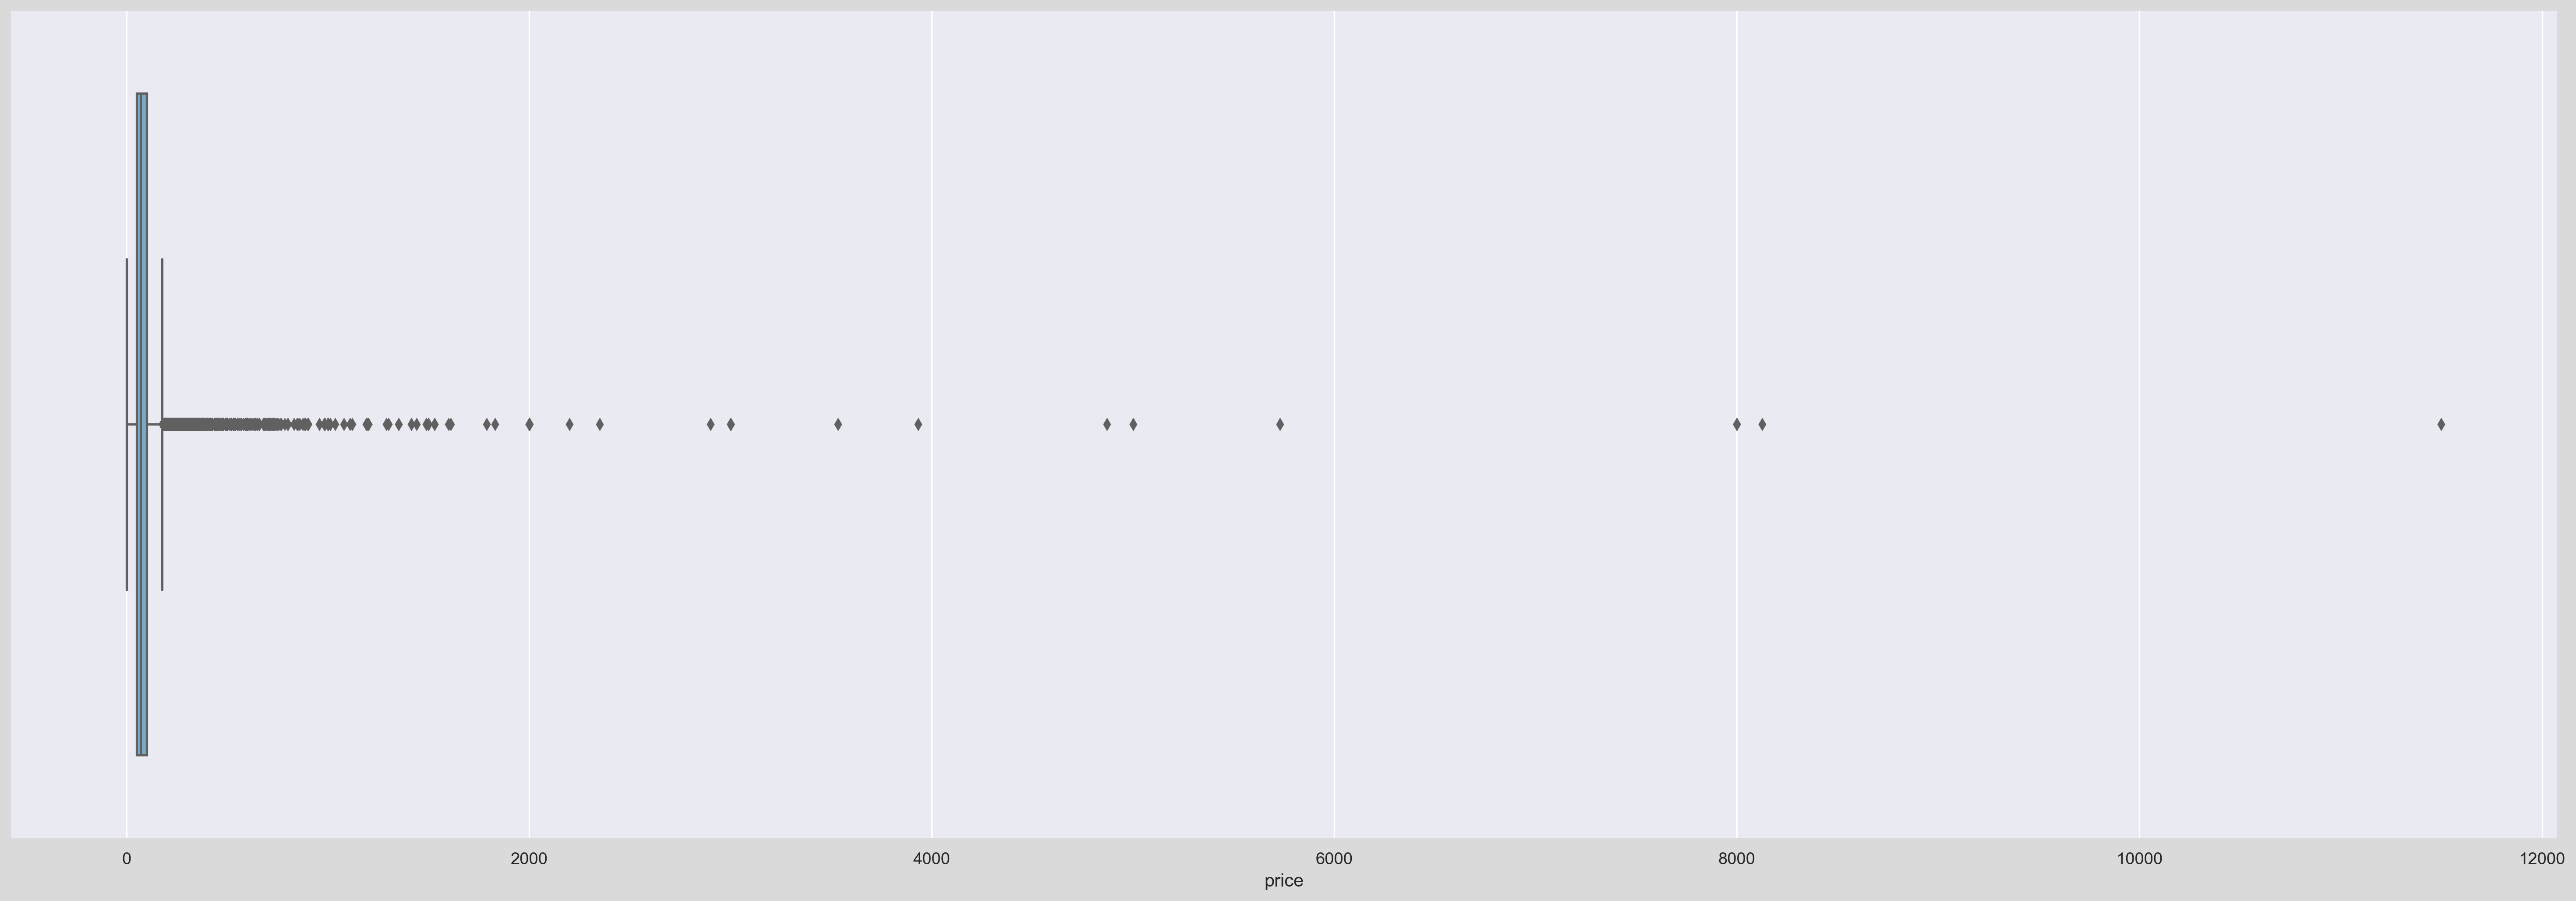

In [35]:
# to set the facecolor
plt.figure(dpi=250, facecolor = '#dadada', figsize=(30,10))

sns.boxplot('price', data=airbnb, palette='Blues')
# plt.ylim(0,5000)# Remove the splines 
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
        
plt.savefig(r"box2.png")

plt.show()

Its hard to believe that a nightly price of an airbnb would go all the way up to 12000. In short there are a lot of outliers in price that could really throw off our predictions

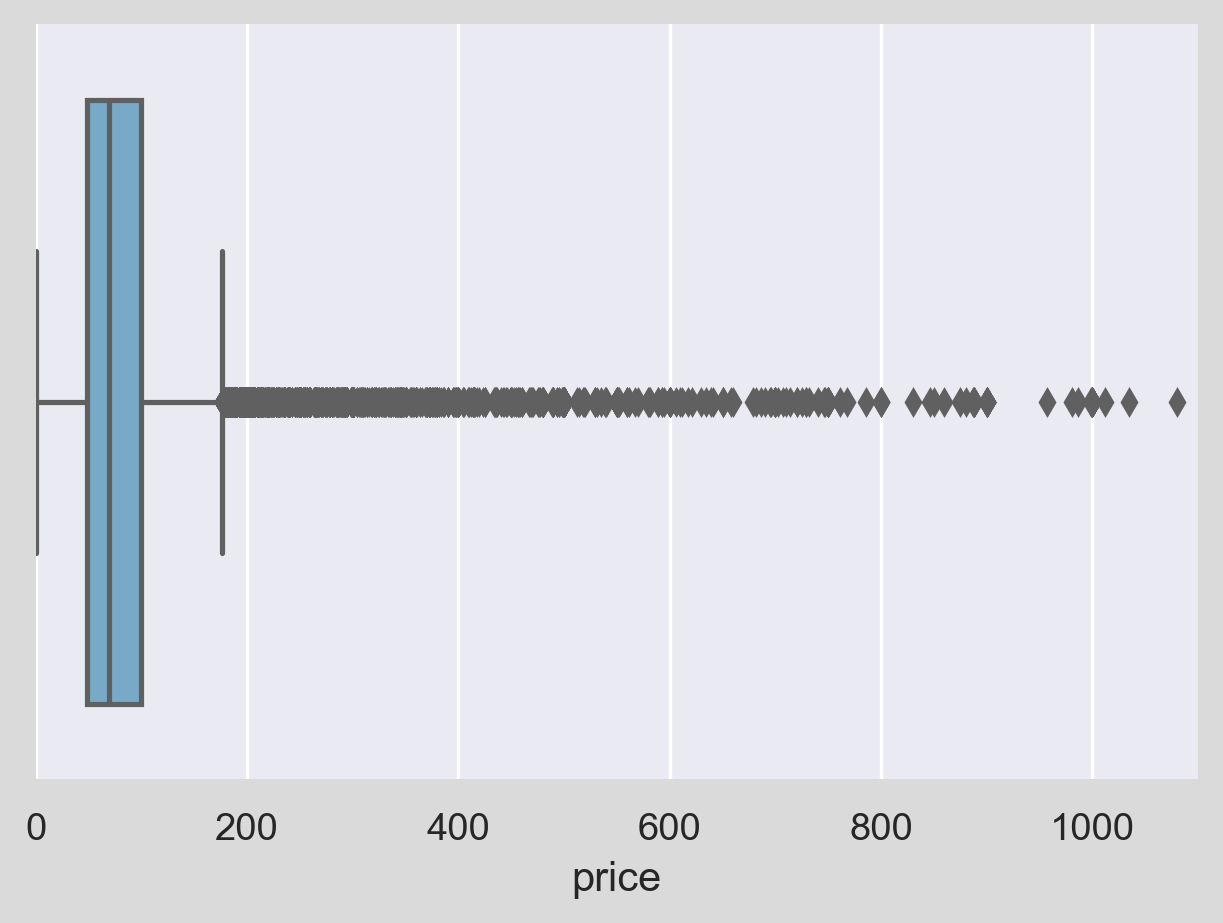

In [36]:
plt.figure(dpi=250, facecolor = '#dadada')
# by limitting the x axis we are no able to see the box
sns.boxplot('price', data=airbnb, palette='Blues')
plt.xlim(0,1100)

# Remove the splines 
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.savefig(r"box1.png")

plt.show()


Looking at the box plot interquartile range of airbnb nightly price is between 49 to 110, and about 98 is the mean.

In [37]:
#to get rid of the outliers and to bring down the skewness we will only use price below 1000 and above 24

airbnb = airbnb.loc[(airbnb.price < 1000) & (airbnb.price > 24)]

In [38]:
# checking how much did we control the skewness on price 
airbnb.price.skew()

4.176850803487299

We were able to bring down the skewness of our target variable down to 4.18 from 28.71 and the rest we will take care by applying log later.

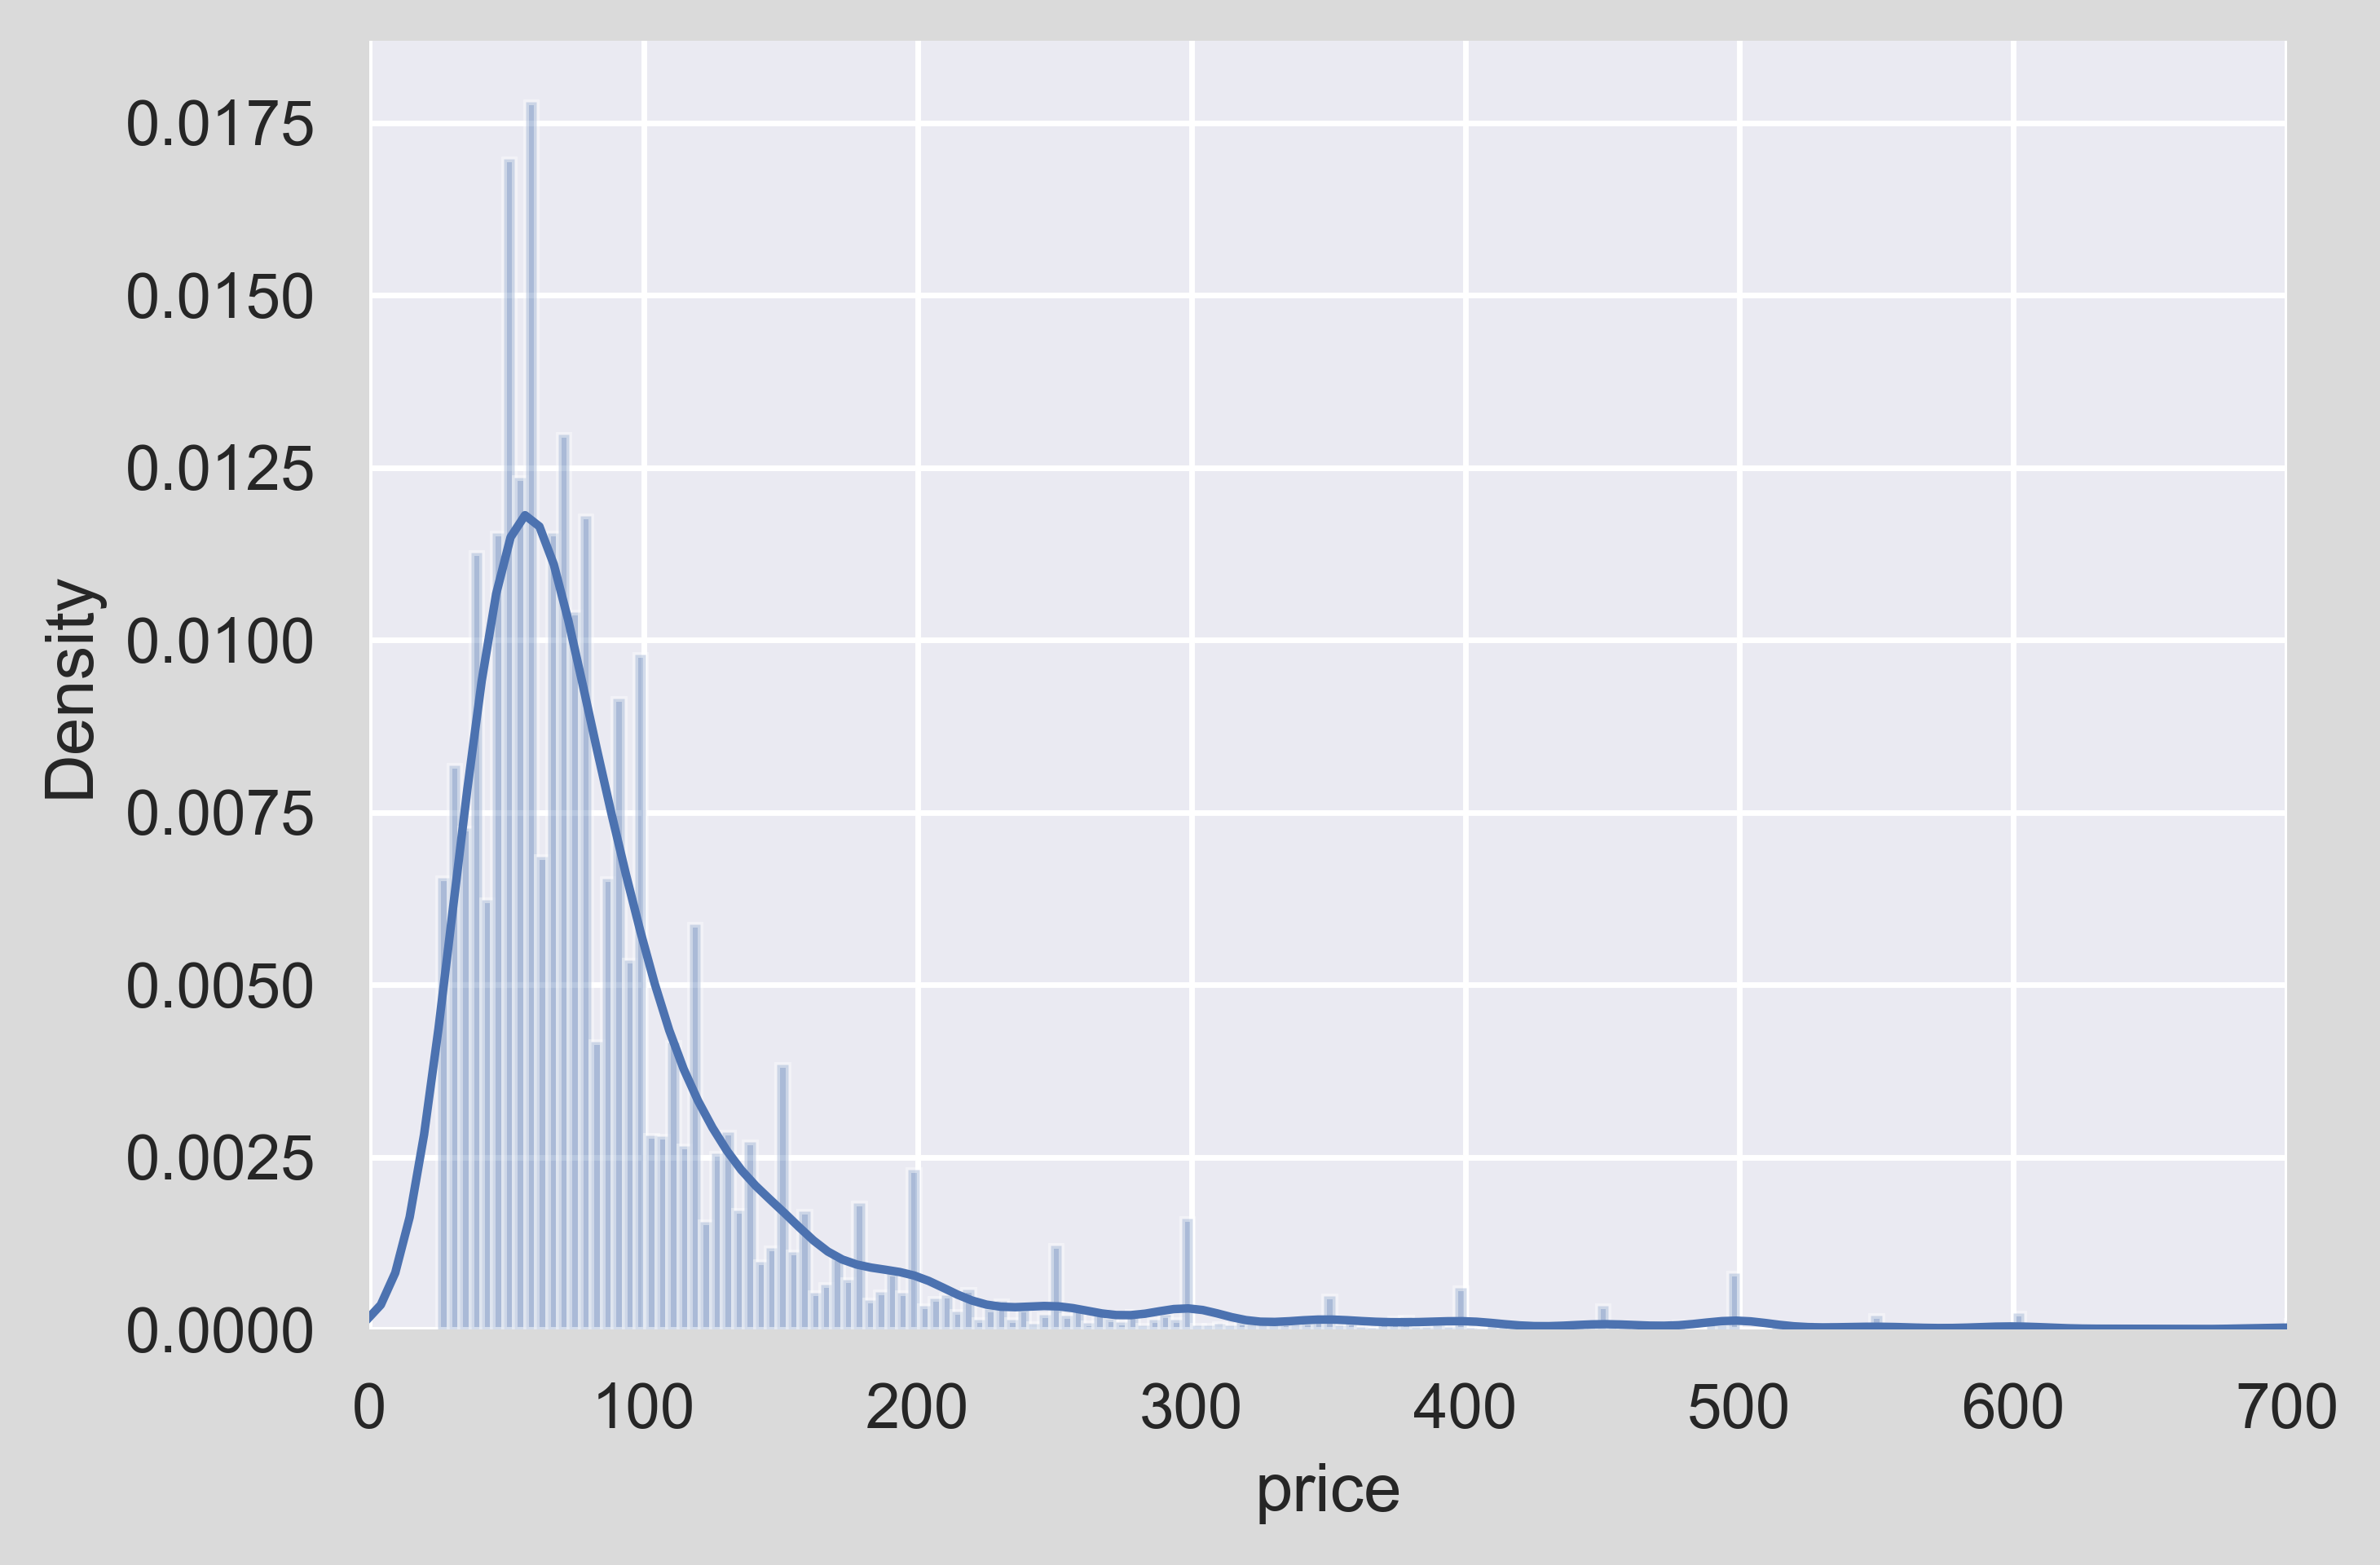

In [39]:
# Looks much better than before 
def plotting_to_check_skewness():
    for col in ['price']:
        # to set the facecolor
        plt.figure(dpi=500, facecolor = '#dadada')
        # setting the limit on the x axis to be able to visualize as we have a big outliers
        plt.xlim(0, 700)
        
        sns.distplot(airbnb[col], kde=True, bins='auto')
        
        # Remove the splines 
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["bottom"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        plt.gca().spines["left"].set_visible(False)

        plt.tight_layout() # Makes it better looking specially on laptops

        # to save the fig
        plt.savefig('skew.png',bbox_inches='tight', dpi=500, facecolor = '#dadada')

        plt.show()
        
plotting_to_check_skewness()

## Correlations

In [40]:
def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

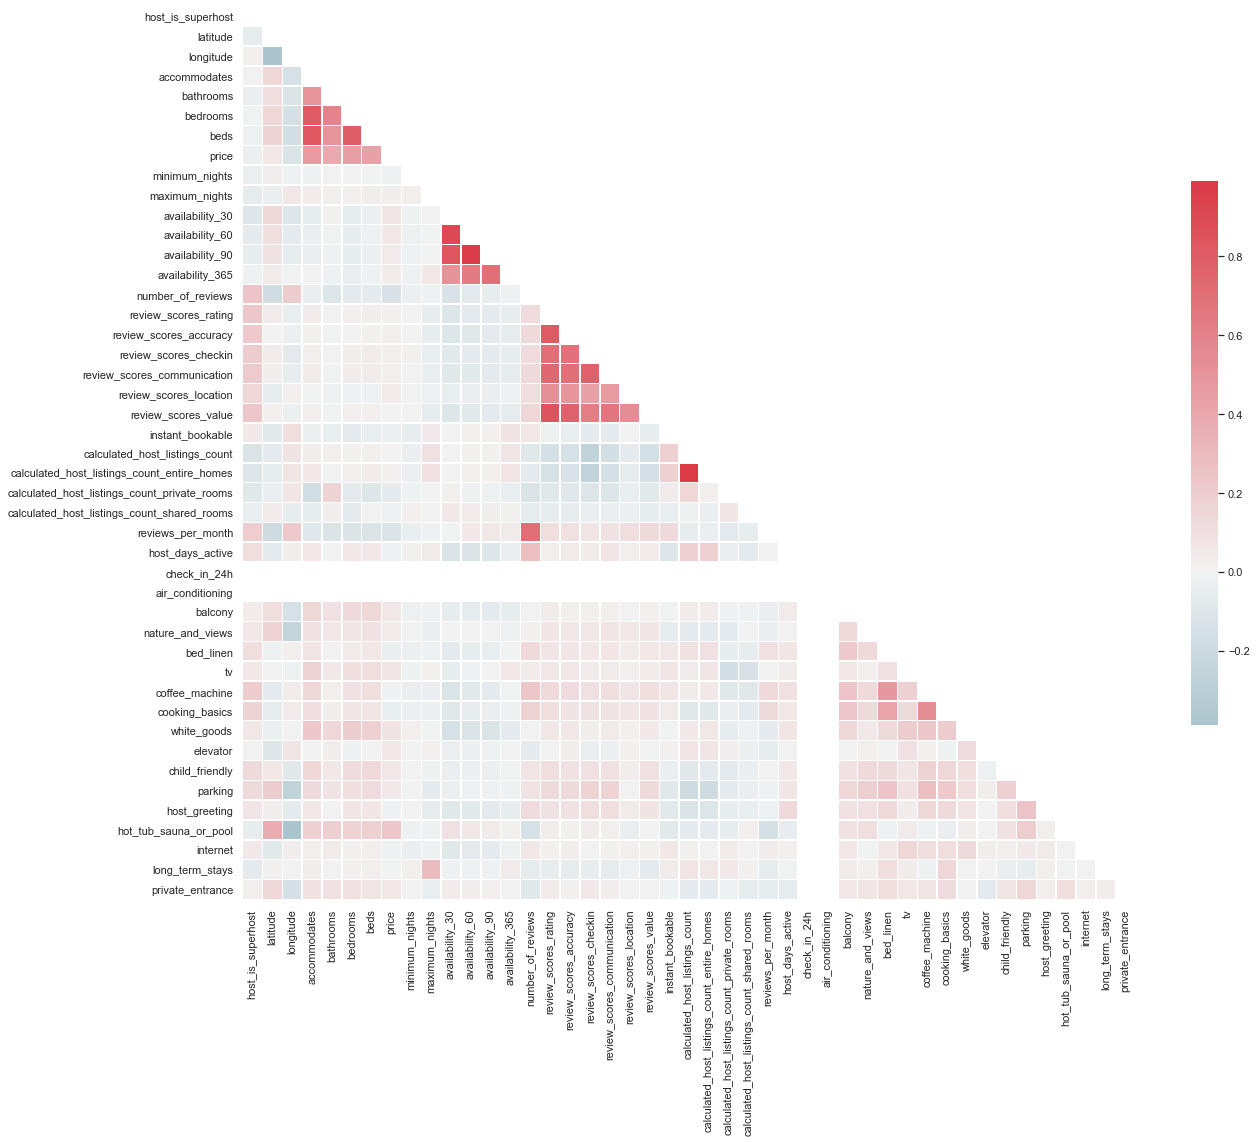

In [41]:
multi_collinearity_heatmap(airbnb, figsize=(20,20))

Areas of multi-collinearity:

- Beds, bedrooms and the number of people that a property accommodates are highly correlated. The number of people accommodated has traditionally been a more high priority 
search parameter on Airbnb, as it is more relevant for private and shared rooms than the number of bedrooms (and is still the second highest priority parameter when searching on 
                                                                                                             the site, after dates.

- Unsurprisingly, there are perfect correlations between NaN reviews (i.e. listings that are not reviewed yet) for different review categories, and first and last review times. 
                                                                                                             NaN categories can therefore be dropped.

- The same is true of host_response_rate_unknown and host_response_time_unknown. One of these rates will be dropped.

- There is a correlation between host_response_rate 0-49% and host_response_time_a few days or more. One of these will be dropped.

- There are strong negative correlations between property_type_House and property_type_Apartment, and between room_type_Private room and room_type_Entire_home_apt (as these were the main two categories of their features before they were one-hot encoded). Although these are important categories, one of each will be dropped in order to reduce multi-collinearity (apartments and private rooms, as these are the second most common categories).

- two of the three availability_30, availability_60, availability_90 could also be deleted as they are highly correalted between eachother.

- one of the reviews_per_month or number_of_reviews could be deleted as they are highly correalted between eachother( since reviews_per>_month has 13% of nulls, the other one will be kept)

In [42]:
drop_cols4 = [ 'availability_60', 'availability_90', 'reviews_per_month']

airbnb.drop(drop_cols4, axis=1, inplace=True)

In [43]:
# Resetting the index as we deleted some rows 
airbnb.reset_index(drop=True, inplace=True)

`first_review` and `last_review`

Almost 14 percent of listings have not had a review written for them. This is too large a proportion of the dataset to drop, and dropping the columns would lose a lot of useful information because reviews are very important in people's decisions to book, and therefore price.

This is also too large a proportion of the dataset to simply replace with median/mean values, as this would skew the distribution substantially. Also, the missing values here are not really missing values, as the fact that they are NaNs is meaningful - it tells us that these are new or previously unbooked listings that have not had reviews yet. In order to make the resulting model work able to predict prices for any Airbnb listing, including brand new listings, is is actually beneficial to keep them in. Therefore, these will be kept as an unknown category, and the feature will have to be treated as categorical (and therefore one-hot encoded) rather than numerical.

In [44]:
print(f"Null values in 'first_review': {round(100*airbnb.first_review.isna().sum()/len(airbnb),1)}%")
print(f"Null values in 'review_scores_rating': {round(100*airbnb.review_scores_rating .isna().sum()/len(airbnb),1)}%")

Null values in 'first_review': 13.2%
Null values in 'review_scores_rating': 13.2%


In [45]:
# Calculating the number of days between the first review and the date the data was scraped
airbnb['time_since_first_review'] = (pd.datetime(2019, 4, 9) - airbnb.first_review).astype('timedelta64[D]')

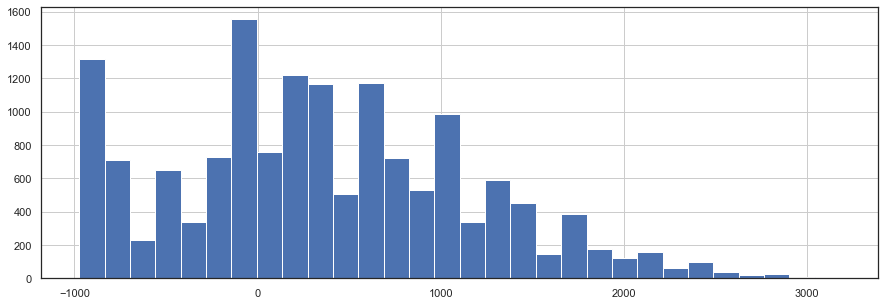

In [46]:
# Distribution of the number of days since first review
airbnb.time_since_first_review.hist(figsize=(15,5), bins=30);

In [47]:
def bin_column(col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    airbnb[col] = pd.cut(airbnb[col], bins=bins, labels=labels, include_lowest=True)
    airbnb[col] = airbnb[col].astype('str')
    airbnb[col].fillna(na_label, inplace=True)

In [48]:
# Binning time since first review
bin_column('time_since_first_review',
           bins=[0, 182, 365, 730, 1460, max(airbnb.time_since_first_review)],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'],
           na_label='no reviews')

Same process for `last_review`

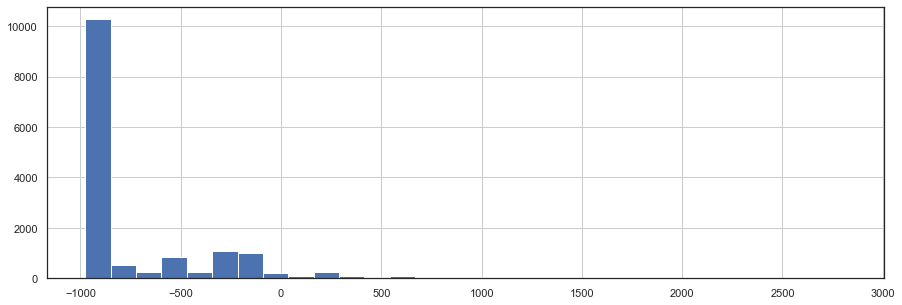

In [49]:
airbnb.last_review = pd.to_datetime(airbnb.last_review) # Converting to datetime

# Calculating the number of days between the most recent review and the date the data was scraped
airbnb['time_since_last_review'] = (pd.datetime(2019, 4, 9) - airbnb.last_review).astype('timedelta64[D]')

# Distribution of the number of days since last review
airbnb.time_since_last_review.hist(figsize=(15,5), bins=30);

In [50]:
# Binning time since last review
bin_column('time_since_last_review',
           bins=[0, 14, 60, 182, 365, max(airbnb.time_since_last_review)],
           labels=['0-2 weeks',
                   '2-8 weeks',
                   '2-6 months',
                   '6-12 months',
                   '1+ year'],
           na_label='no reviews')

`review ratings columns`

As above, listings without reviews will be kept and replaced with unknown. Other ratings will be grouped into bins. The histograms below were produced in order to decide on useful bins. The majority of ratings are 4 or 5 out of 5, as also seen in the value count below. Therefore for these columns, 4/5 and 5/5 will be kept as separate groups, and 1-3/5 will be binned together (as this is, by Airbnb standards, a 'low' rating).

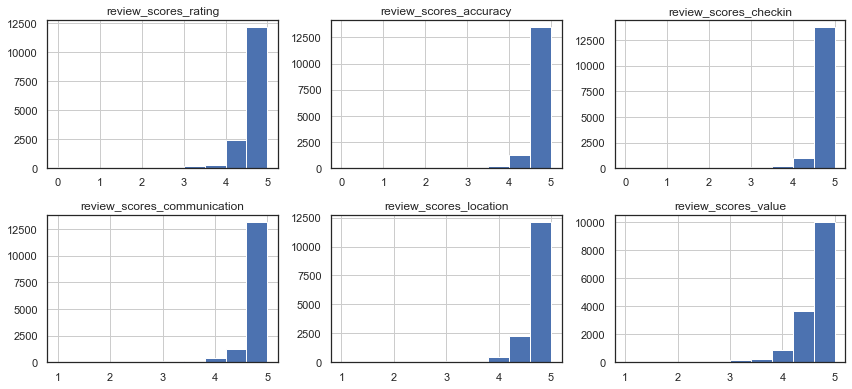

In [51]:
# Checking the distributions of the review ratings columns
variables_to_plot = list(airbnb.columns[airbnb.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    airbnb[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [52]:
# Creating a list of all review columns that are scored out of 5
variables_to_plot.pop(0)

# Binning for all columns scored out of 5
for col in variables_to_plot:
    bin_column(col,
               bins=[0, 3, 4, 5],
               labels=['0-3/5', '4/5', '5/5'],
               na_label='no reviews')
    


In [55]:
# Binning column scored out of 100
bin_column('review_scores_rating',
           bins=[0, 80, 95, 100],
           labels=['0-79/100', '80-94/100', '95-100/100'],
           na_label='no reviews')

In [58]:

airbnb.to_csv('cleaned_data.csv')